# Collection of Utilities for T-DAB Challenge

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing labeled data 
df= pd.read_csv('./data/test_data.csv', header = 0)
# Check raw data variable information: rows, columns, non-nulls, dtypes
df.info()
# data_raw.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CurrentSpeed  219833 non-null  float64
 1   CurrentDir    219832 non-null  float64
 2   TWS           219837 non-null  float64
 3   TWA           219833 non-null  float64
 4   AWS           219834 non-null  float64
 5   AWA           219838 non-null  float64
 6   Roll          219833 non-null  float64
 7   Pitch         219836 non-null  float64
 8   HeadingMag    219835 non-null  float64
 9   HoG           219838 non-null  float64
 10  HeadingTrue   219837 non-null  float64
 11  AirTemp       219840 non-null  float64
 12  Longitude     219836 non-null  float64
 13  Latitude      219840 non-null  float64
 14  SoG           219842 non-null  float64
 15  SoS           219840 non-null  float64
 16  AvgSoS        219838 non-null  float64
 17  VMG           219837 non-null  float64
 18  Rudd

### Counting Values Function

In [3]:
# Function to check unique values of categorical variables and their respective counts
def counting_values(df, var_list, sort = True, verbose = True):
    for col in var_list:
        try:
            series = None
            series = df[col]
            if verbose:
                print("Counts for '{}' variable:".format(col))
                if sort:
                    print(series.value_counts(dropna = False).sort_index())
                    print()
                else:
                    print(series.value_counts(dropna = False))
                    print()
        except:
            pass
    return

In [4]:
# Select columns to inspect. I.e: those with less than 'x' unique values
uniques = 20
columns = [col for col in df.columns if len(df[col].unique()) < uniques ]
# Call function on our data
counting_values(df,columns)

Counts for 'Leeway' variable:
-10.0       121
-9.0         22
-8.0         25
-7.0         25
-6.0         37
-5.0         86
-4.0        688
-3.0       6817
-2.0      66051
-1.0     112020
 0.0      33880
 1.0         43
 2.0         11
 3.0          7
 4.0          3
 5.0          2
 9.0          1
 NaN        161
Name: Leeway, dtype: int64

Counts for 'ModePilote' variable:
2.0    188870
5.0     30969
NaN       161
Name: ModePilote, dtype: int64

Counts for 'Tacking' variable:
0.0    173956
1.0     46039
NaN         5
Name: Tacking, dtype: int64



### Module for building and plotting PMFs and CDFs

In [5]:
# Install required packages/modules
# https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb
!pip install empiricaldist

In [6]:
# Building empirical distribution from series
from empiricaldist import Pmf
pmf_leeway = Pmf.from_seq(df['Leeway'], normalize=True)

pmf_leeway.head()

-10.0    0.000550
-9.0     0.000100
-8.0     0.000114
-7.0     0.000114
-6.0     0.000168
Name: Leeway, dtype: float64

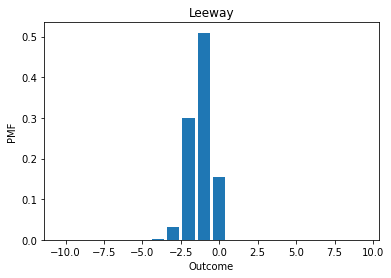

In [7]:
def decorate(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Outcome')
    plt.ylabel('PMF')
    plt.title(title)


pmf_leeway.bar()
decorate('Leeway')

### Functions to test `pd.interpolate()`

In [ ]:
TWS_mask = df['TWS'].isnull()
df.iloc[15305:15315]

### Temperature plots 

In [ ]:
# Temperature Plot with Resampling 
# Some options: '#min' = '#T', 'H', 'D', 'B' (business day), 'W', 'M', 'Q', 'Y'
fig = plt.gcf()
fig.set_size_inches(15,8)

ax = df['AirTemp'].resample('30min').mean().plot(color = 'b')
ax.set_title('Temperature over Time')
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('Temperature [Celcius]', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
# Temperature plot Slicing by Index
fig = plt.gcf()
fig.set_size_inches(15,8)

ax = df['AirTemp']['2019-04-14 06:00:00':'2019-04-14 07:00:00'].plot(color = 'b')
ax.set_title('Temperature over Time')
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('Temperature [Celcius]', fontsize = 20)

# Add a red vertical line
ax.axvline('2019-04-14 06:30:00', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(30, color='green', linestyle='--')

# Add a vertical red shaded region between the dates of 1900-01-01 and 1915-01-01
ax.axvspan('2019-04-14 06:10:00','2019-04-14 06:20:00', color='orange', alpha=0.3)

# Add a horizontal green shaded region between the values of 6 and 8
ax.axhspan(31, 32, color='green', alpha=0.3)


plt.xticks(rotation = 'vertical')
plt.show()

### Metrics

In [13]:
# Compute accuracy
acc = accuracy_score(y_test, y_pred)
# print("Test set accuracy: {:.2f}".format(acc))

# Compute precision
pres = precision_score(y_test, y_pred)
# print("Precision: \n",pres)

# Compute recall
reca = recall_score(y_test, y_pred)
# print("Recall: \n",reca)

# Compute f1-score
f1 = f1_score(y_test, y_pred)
# print("F1: \n",f1)

NameError: name 'accuracy_score' is not defined

### XGBoost

In [ ]:
%%capture
!brew install libomp
!pip install xgboost
import xgboost as xgb

In [14]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [ ]:
kfold = 5
skf = StratifiedKFold(n_splits=kfold)

params = {
    'min_child_weight': 10.0,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.65,
    'num_boost_round' : 700
    }

X = X_trees.values
y = y_trees.values

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    # Convert our data into XGBoost format
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test.values)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    # Train the model! We pass in a max of 1,600 rounds (with early stopping after 70)
    # and the custom metric (maximize=True tells xgb that higher metric is better)
    mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=70, feval=gini_xgb, maximize=True, verbose_eval=100)

    print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
    # Predict on our test data
    p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
    sub['target'] += p_test/kfold

### Feature Engineering

In [16]:
#######################################
# Instantiate Box-Cox Power Transformer
# boxcox_transformer = PowerTransformer(method='box-cox')

# Boxcox variables
# pre_boxcox_vars = ['AirTemp']
# boxcox_vars = ['boxcox_airtemp']

# Fit-Trasform boxcox columns
#df[pre_boxcox_vars] = log_current_speed.fit_transform(df[pre_boxcox_vars])

### Decision Tree Threshold probabilities

In [17]:
sub_dt = pd.DataFrame()

sub_dt['probas'] = dt.predict_proba(X_test)[:,1]

# Get Predictions
sub_dt.loc[sub_dt['probas'] < 0.8 , 'predict'] = 0 
sub_dt.loc[sub_dt['probas'] >= 0.8 , 'predict'] = 1 

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, sub_dt['predict'])
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, sub_dt['predict'])
print("Report: \n",report)


NameError: name 'dt' is not defined

### Comparing Labels

In [ ]:
# True vs Pred 
real_vs_pred = y_val.copy().reset_index()[['Tacking']]
#real_vs_pred['True Labels'] = y_val
real_vs_pred['Predictions'] = sub_dt['predict']
real_vs_pred.reset_index(inplace = True)
real_vs_pred.head()


# Checking True vs Predicted Labels
real_vs_pred.plot(x='index', y='Tacking', kind = 'scatter', color = 'g', figsize = (7,7),label = 'best')
plt.axis([0,100, 0, 1])
real_vs_pred.plot(x='index', y='Predictions', kind = 'scatter', color = 'g', figsize = (7,7),label = 'best')
plt.xticks(rotation = 'vertical')
plt.axis([0,100, 0, 1])
# plt.ylim((0,1))
plt.show()

### XGBoost A) 

In [ ]:
xgb_params = {
    'objective': 'binary:logistic',
    'reg_lambda': 0.8,
    'reg_alpha': 0.4,
    'max_depth': 7,
    'min_samples_leaf': 100,
    'min_samples_split': 2,
}
clf = xgb.XGBClassifier(**xgb_params)
clf.fit(X, np.ravel(y), eval_metric='auc', verbose=True)

print(type(clf))
print(clf.get_xgb_params())

# Predict on unseen dataset
y_xgb_pred = clf.predict(X)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_xg_pred)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, y_xg_pred)
print("Report: \n",report)

### XGBoost B) 

In [1]:
# Defining Training and Test Set
X = X_trees.values
y = y_trees.values
test = X_test

# Defining submission object
sub = pd.DataFrame()
sub['id'] = X_test.index
sub['target'] = np.zeros_like(X_test.index)

# Instatiate StratifiedKFold object
kfold = 5
skf = StratifiedKFold(n_splits=kfold)

# More parameters has to be tuned. Good luck :)
params = {
    # 'min_child_weight': 10.0,
    'objective': 'binary:logistic', # Gives probability of belonging to a class
    'eval_metric': 'auc',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 1,
    'subsample': 1,
    'eta': 0.02,
    'gamma': 0,
    'class_weight': 'balanced'
    # 'num_boost_round' : 700
    }

NameError: name 'X_trees' is not defined

In [2]:
# Defining gini metric
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [3]:
def build_kf_xgb_model(X = X, y = y, test = test, params = params ):
    # Train XGBoost with Stratified-KFolds
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        print('[Fold %d/%d]' % (i + 1, kfold))
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        # Convert our data into XGBoost format
        d_train = xgb.DMatrix(X_train, y_train)
        d_valid = xgb.DMatrix(X_valid, y_valid)
        d_test = xgb.DMatrix(test.values)
        watchlist = [(d_train, 'train'), (d_valid, 'valid')]

        # Train the model! We pass in a max of 1,600 rounds (with early stopping after 70)
        # and the custom metric (maximize=True tells xgb that higher metric is better)
        mdl = xgb.train(params, d_train, 1600, watchlist, early_stopping_rounds=70, feval=gini_xgb, maximize=True, verbose_eval=100)

        print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
        # Predict on our test data
        p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
        sub['target'] += p_test/kfold
        return sub
    
# sub = build_kf_xgb_model(X, y, test, params)

NameError: name 'X' is not defined

In [4]:
try: 
    # Get Predictions
    sub.loc[sub['target'] < 0.5 , 'predict'] = 0 
    sub.loc[sub['target'] >= 0.5 , 'predict'] = 1 
    sub.target.min()

    # Predict on unseen dataset
    y_xg_pred = sub['predict']

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_xg_pred)
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_test, y_xg_pred)
    print("Report: \n",report)
    
except:
    pass

### Logistic Regression

In [5]:
# Instantiate LogisticRegression classifier
lr = LogisticRegression()

# Fit the LR classifier
lr.fit(X_dbc, y_dbc)

NameError: name 'LogisticRegression' is not defined

In [7]:
# Predict on unseen dataset
y_pred_lr = lr.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, y_pred_lr)
print("Report: \n",report)

NameError: name 'lr' is not defined

### Linear SVC

In [ ]:
# Instantiate linear SVM classifier
lsvm = LinearSVC(max_iter = 10000)

# Fit the SVM classifier
lsvm.fit(X_dbc, y_dbc)

In [ ]:
# Predict on unseen dataset
y_pred_lsvm = lsvm.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_lsvm)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, y_pred_lsvm)
print("Report: \n",report)

### Non-linear SVC

In [8]:
# Instantiate SVM classifier
svm = SVC()

# Fit the SVM classifier
svm.fit(X_dbc, y_dbc)

NameError: name 'SVC' is not defined

In [ ]:
# Predict on unseen dataset
y_pred_svm = svm.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, y_pred_svm)
print("Report: \n",report)

### KNN

In [ ]:
# Instantiate SVM classifier
knn = KNeighborsClassifier(n_neighbors = 100)

# Fit the SVM classifier
knn.fit(X_dbc, y_dbc)

In [9]:
# Predict on unseen dataset
y_pred_knn = knn.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, y_pred_knn)
print("Report: \n",report)

NameError: name 'knn' is not defined

### Multiple Time Steps

In [10]:
# Reshaping Training and Test as input for LSTM 
time_steps = 10*2*2*2*2 # Intervals of 160 s = 2.67 min
X_train= X_train_df.values.reshape((-1, time_steps, X_train_df.shape[1]))
y_train = y_train_df.values.reshape(-1, 1)
X_test= X_test_df.values.reshape(-1, time_steps, X_train_df.shape[1])
y_test = y_test_df.values.reshape(-1,time_steps)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

NameError: name 'X_train_df' is not defined

### Removed Feature Selection Cell from LSTM

In [12]:
# Read SEEN data
df = pd.read_csv('./data/seen_data.csv',header = 0)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create a list of column names to drop
to_drop = [] + \
[] + \
[] + \
[] + \
[] + \
[] + \
[] + \
[] + \
[] + \
[] + \
[] + \
[]

keep = ['TWS', 'AWS', 'WSoG'] + \
['SoS', 'AvgSoS', 'SoG','VMG'] + \
['AWA','TWA', 'TWD'] + \
['HoG', 'HeadingTrue' ,'HeadingMag', 'Yaw'] + \
['CurrentDir', 'CurrentSpeed'] + \
['Roll','Pitch'] + \
['RudderAng', 'Leeway'] + \
['VoltageDrawn'] + \
['Longitude', 'Latitude'] + \
['AirTemp'] + \
['DateTime'] + \
['ModePilote']

# Assert Number of Variables
assert len(to_drop) + len(keep) == 26

# Drop those columns from the dataset
df = df.drop(to_drop, axis=1)

#############################################################################
# selection = ['DateTime', 'CurrentSpeed', 'CurrentDir', 'TWA', 'AWS', 'AWA',
#       'Roll', 'Pitch', 'HeadingMag', 'HoG', 'HeadingTrue', 'AirTemp',
#       'Longitude', 'Latitude', 'SoS', 'AvgSoS', 'VMG', 'RudderAng',
#       'Leeway', 'TWD', 'WSoG', 'VoltageDrawn', 'ModePilote']
# df = df.drop(selection, axis=1)

# Print remaning columns
df.columns

NameError: name 'pd' is not defined